<h2>EN2550: Assignment 03 on Object Counting on a Conveyor Belt</h2>

<h3>Connected Component Analysis</h3>

components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1) Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

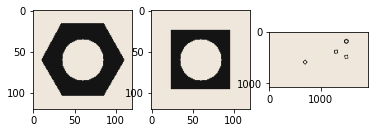

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

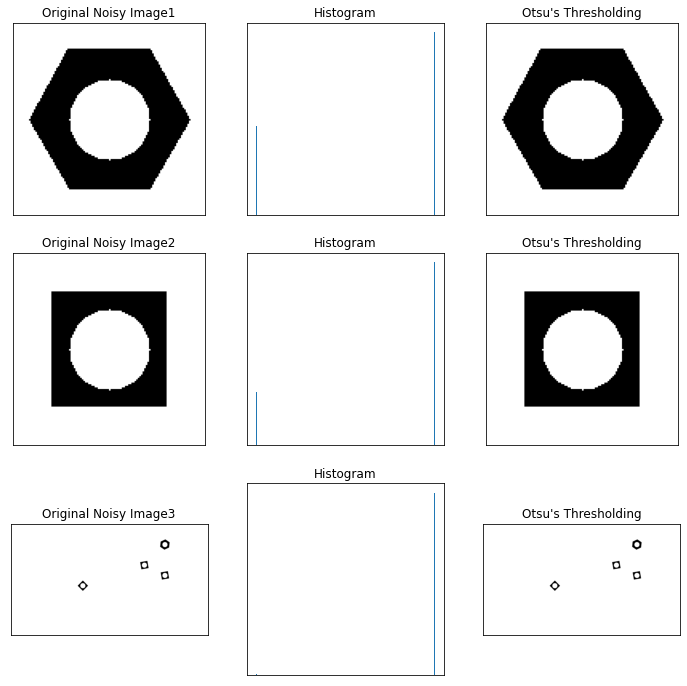

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template_gray = cv.imread('hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_template_gray =  cv.imread('squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100_gray =  cv.imread('conveyor_f100.png', cv.IMREAD_GRAYSCALE)

# Otsu's thresholding
ret1,th1 = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# # Otsu's thresholding after Gaussian filtering
# blur = cv.GaussianBlur(img,(5,5),0)
# ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [hexnut_template_gray, 0, th1,
          squarenut_template_gray, 0, th2,
          conveyor_f100_gray, 0, th3]
titles = ['Original Noisy Image1','Histogram',"Otsu's Thresholding",
            'Original Noisy Image2','Histogram',"Otsu's Thresholding",
          'Original Noisy Image3','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(12,12))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
ret1

20.0

Carry out morphological closing to remove small holes inside the foreground. Use a 3×3 kernel. </br>
See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

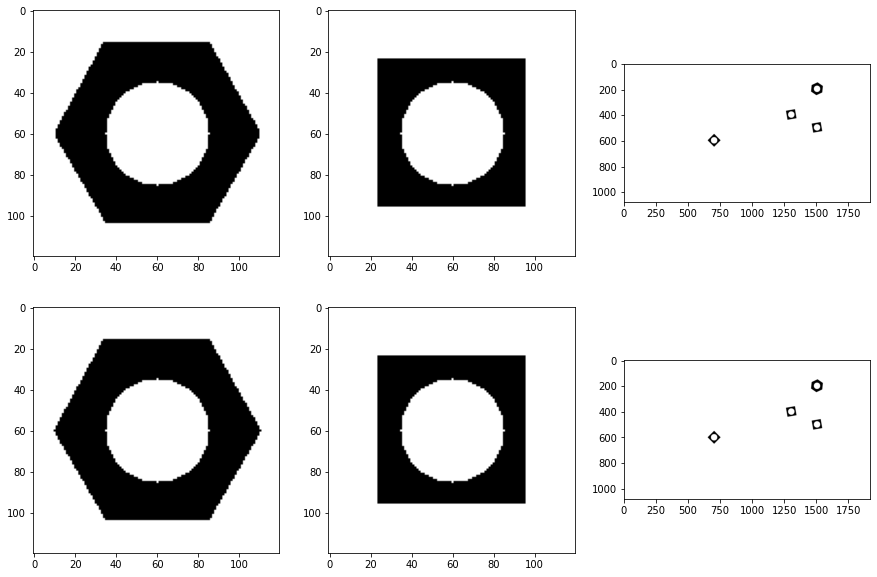

In [11]:
kernel = np.ones((3,3),np.uint8)
closed_hexnut_template = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closed_squarenut_template = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closed_conveyor_belt = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)
fig, ax = plt.subplots(2,3,figsize =(15,10))
ax[0,0].imshow(closed_hexnut_template,'gray')
ax[0,1].imshow(closed_squarenut_template,'gray')
ax[0,2].imshow(closed_conveyor_belt,'gray')
ax[1,0].imshow(th1,'gray')
ax[1,1].imshow(th2,'gray')
ax[1,2].imshow(th3,'gray')
plt.show()

In [22]:
c = (closed_conveyor_belt == th3)
for i in range(1080):
    for j in range(1920):
        if c[i][j] == False:
            print('got it', (i,j))

got it (150, 1503)
got it (150, 1504)
got it (249, 1495)
got it (249, 1496)
got it (550, 700)
got it (600, 650)
got it (600, 750)
got it (650, 700)


Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. </br>
Answer the following questions</br>
How many connected components are detected in each image?</br>
What are the statistics? Interpret these statistics.</br>
What are the centroids?</br>
For the hexnut template, you should get the object area in pixel as approximately 4728.

In [42]:
connectivity = 8
output_hexnut = cv.connectedComponentsWithStats(closed_hexnut_template,connectivity, cv.CV_32S)
numLabels_hex = output_hexnut[0] 
labels_hex = output_hexnut[1]
stats_hex = output_hexnut[2]
centroids_hex = output_hexnut[3]

In [43]:
output_hexnut
count = 0
for i in range(120):
    for j in range(120):
        if labels_hex[i][j]!=1:
            count +=1
print(count)

6685


In [44]:
count = 0
for i in range(120):
    for j in range(120):
        if labels_hex[i][j]==1:
            count +=1
print(count)

7715


In [39]:
120*120

14400

In [24]:
output_squarenut = cv.connectedComponentsWithStats(closed_squarenut_template, connectivity, cv.CV_32S)
numLabels_square = output_squarenut[0]
labels_square = output_squarenut[1]
stats_square = output_squarenut[2]
centroids_square = output_squarenut[3] 

In [25]:
output_conv = cv.connectedComponentsWithStats(closed_conveyor_belt,connectivity, cv.CV_32S)
numLabels_conv = output_conv[0]
labels_conv = output_conv[1]
stats_conv = output_conv[2]
centroids_conv = output_squarenut[3]

In [27]:
numLabels_hex , centroids_hex

(3,
 array([[59.83354511, 59.22257518],
        [59.168848  , 59.54269794],
        [60.        , 60.        ]]))

In [26]:
numLabels_conv , centroids_conv

(6,
 array([[59.19578033, 59.19578033],
        [59.5       , 59.5       ],
        [60.        , 60.        ]]))

Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.</br>
Display these contours.

In [28]:
ret, thresh = cv.threshold(th3, 127, 255, 0)
contours_convayer, hierarchy_convayer = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [29]:
print("The Total Number of Contours in the Image = ")
#command len used to calculate the number of contours in the image
print (str(len(contours_convayer)))
print(contours_convayer[0])
cv.drawContours(conveyor_f100, contours_convayer, -1,(0,2550,0),3)
cv.drawContours(conveyor_f100_gray, contours_convayer, -1,(0,255,0),3)
cv.imshow('Image', conveyor_f100)
cv.waitKey(0)
cv.imshow('Image GRAY', conveyor_f100_gray)
cv.waitKey(0)
cv.destroyAllWindows()

The Total Number of Contours in the Image = 
9
[[[   0    0]]

 [[   0 1079]]

 [[1919 1079]]

 [[1919    0]]]


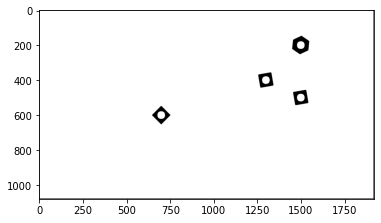

In [30]:
cv.drawContours(th3, contours_convayer, -1, (0,255,0), 3)
plt.figure()
plt.imshow(th3,'gray')
plt.show()

<h3>Detecting Objects on a Synthetic Conveyor</h3>
In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

In [10]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.

In [26]:
ret = cv.matchShapes(hexnut_template_gray,conveyor_f100_gray,1,0.0)
print( ret )

0.017000579923957593


In [30]:
cnt1 =contours_convayer[0]
cnt2 =contours_convayer[1]

Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [ ]:
# Yor code here.


# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()